# 안녕하세요, 에이블러 여러분!
## AIVLE스쿨 '서울시 생활정보 기반 대중교통 수요 분석 ' 과정에 오신 여러분을 환영합니다.
* 본 과정에서는 실제 사례와 데이터를 기반으로 문제를 해결하는 전체 과정을 자기 주도형 실습으로 진행해볼 예정입니다.
* 앞선 교육과정을 정리하는 마음과 지금까지 배운 내용을 바탕으로 문제 해결을 해볼게요!
* 미니 프로젝트를 통한 문제 해결 과정 'A에서 Z까지', 지금부터 시작합니다!

---

# 데이터 분석부터 먼저 시작해보겠습니다.
## "버스 정류장 데이터" 를 확인해 보도록 하겠습니다

In [9]:
# 필요 라이브러리부터 설치합니다.
%pip install pandas seaborn

Note: you may need to restart the kernel to use updated packages.


## 기본전제
* 제공되는 기본/추가 데이터는 '에이블러용' 폴더에 있습니다.

[기본 데이터]
* 1.1 bus_station_boarding_month_202401.csv

* 서울시 버스노선별 정류장별 승하차 인원 정보
* https://data.seoul.go.kr/dataList/OA-12912/S/1/datasetView.do


[추가 데이터]
* 1.1 bus_station_202401.xlsx

* 서울시 버스정류장 위치정보
* https://data.seoul.go.kr/dataList/OA-15067/S/1/datasetView.do

---

# 1.데이터 불러오기
## 모든 미니 프로젝트의 시작은 '데이터 불러오기' 부터입니다.

###  데이터 프레임을 불러오고 변수로 저장(CSV 기준으로 진행)
* csv : pd.read_csv("파일이름. csv")
* txt : pd.read_csv("파일이름. csv", sep="구분자")
* xlsx : pd.read_excel('파일이름.xlsx')
* pickle : pd.read_pickle("파일이름.pkl") <br>
 [참고] pickle은 sklearn 라이브러리를 통해 모델을 학습시키고 저장할 때 많이 사용, 파이썬의 모든 객체를 파일로 저장할 수 있다.

#### [실습문제1] 데이터 로딩
* Pandas 라이브러리를 활용해서 '1.1 bus_station_boarding_month_202401.csv'파일을 'bus_station' 변수에 저장하세요.
    * 데이터 파일 로딩시 참고 사항 
        * 구분자(sep)는 ',' 입니다
        * cp949 인코더를 사용해 주세요

In [10]:
# 아래 실습코드를 실행해주세요.
import sys
import numpy as np
import pandas as pd

In [11]:
# 아래에 실습코드를 작성하고 결과를 확인합니다.
bus_station = pd.read_csv('1.1 bus_station_boarding_month_202401.csv', sep=",", encoding = "cp949")

In [12]:
# 데이터 프레임의 Shape을 확인합니다.

bus_station.shape

(1048575, 8)

---

# 2.기본 정보 확인 및 클렌징

+ 데이터 클렌징 : 결측치, 이상치 등을 제거하여 데이터 분석 결과가 왜곡 되는 문제를 방지하기 위한 정제 과정

#### [실습문제2] 기본 정보 확인하기
* 'bus_station' 데이터의 정보를 확인해보세요.
* 'describe', 'info', 'head' 등 전부 활용해 보세요.

In [13]:
# head()
bus_station.head()

,사용일자,노선번호,노선명,버스정류장ARS번호,역명,승차총승객수,하차총승객수,등록일자
0,20240101,101,101번(화계사~동대문),6178,대광고등학교앞(00055),39,76,20240104
1,20240101,9408,9408번(구미동차고지~고속터미널),22337,헌인마을.서울농업기술센터(00042),1,0,20240104
2,20240101,9408,9408번(구미동차고지~고속터미널),22336,헌인마을.서울농업기술센터(00078),2,0,20240104
3,20240101,9408,9408번(구미동차고지~고속터미널),22334,헌인릉.강남서초과학화예비군훈련장(00043),0,2,20240104
4,20240101,9408,9408번(구미동차고지~고속터미널),22333,헌인릉.강남서초과학화예비군훈련장(00076),2,1,20240104


In [14]:
# tail()
bus_station.tail()

,사용일자,노선번호,노선명,버스정류장ARS번호,역명,승차총승객수,하차총승객수,등록일자
1048570,20240126,종로05,종로05(서대문역~배화여중고),1837,스위스대사관(00025),1,19,20240129
1048571,20240126,종로05,종로05(서대문역~배화여중고),1831,월암공원(00024),25,21,20240129
1048572,20240126,종로05,종로05(서대문역~배화여중고),1514,적십자병원후문앞(00002),9,6,20240129
1048573,20240126,성북07,성북07(정릉4동종점~길음역),8454,정릉4동종점(00014),0,181,20240129
1048574,20240126,종로05,종로05(서대문역~배화여중고),1587,신학대학교총회본부(00011),13,68,20240129


In [15]:
# 아래에 실습코드를 작성하고 결과를 확인합니다.
# info()
bus_station.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1048575 entries, 0 to 1048574
Data columns (total 8 columns):
 #   Column      Non-Null Count    Dtype 
---  ------      --------------    ----- 
 0   사용일자        1048575 non-null  int64 
 1   노선번호        1048575 non-null  object
 2   노선명         1048575 non-null  object
 3   버스정류장ARS번호  1048575 non-null  object
 4   역명          1048575 non-null  object
 5   승차총승객수      1048575 non-null  int64 
 6   하차총승객수      1048575 non-null  int64 
 7   등록일자        1048575 non-null  int64 
dtypes: int64(4), object(4)
memory usage: 64.0+ MB


In [16]:
# 아래에 실습코드를 작성하고 결과를 확인합니다.
# describe()
bus_station.describe().T

,count,mean,std,min,25%,50%,75%,max
사용일자,1048575.0,2.024011e+07,7.455044,20240101.0,20240107.0,20240113.0,20240120.0,20240126.0
승차총승객수,1048575.0,1.030953e+02,148.680136,0.0,13.0,57.0,137.0,5027.0
하차총승객수,1048575.0,1.010178e+02,134.837425,0.0,16.0,62.0,137.0,4352.0
등록일자,1048575.0,2.024012e+07,7.455044,20240104.0,20240110.0,20240116.0,20240123.0,20240129.0


#### [실습문제3] 위 데이터에서 버스정류장 위치를 구 별로 구분 해보기

* 'bus_station' 데이터의 정보를 확인해보세요.

* 버스정류장 ARS번호의 앞 두자리가 구를 의미합니다.

* '자치구' column을 추가 -> 정류장이 위치한 구 이름을 등록


In [17]:
# "버스정류장ARS번호" 컬럼 확인하기
df= pd.DataFrame(bus_station['버스정류장ARS번호'])
df

,버스정류장ARS번호
0,6178
1,22337
2,22336
3,22334
4,22333
...,...
1048570,1837
1048571,1831
1048572,1514
1048573,8454


In [18]:
# 버스정류장 ARS번호에서 시작하는 앞자리 2개로 '자치구'라는 새로운 컬럼 생성
# str() : 정수나 실수를 문자열 형태로 바꿔주는 함수, slice()

bus_station['자치구'] = bus_station['버스정류장ARS번호'].astype(str).str.zfill(5).str.slice(0, 2)

In [19]:
bus_station.head(10)

,사용일자,노선번호,노선명,버스정류장ARS번호,역명,승차총승객수,하차총승객수,등록일자,자치구
0,20240101,101,101번(화계사~동대문),6178,대광고등학교앞(00055),39,76,20240104,06
1,20240101,9408,9408번(구미동차고지~고속터미널),22337,헌인마을.서울농업기술센터(00042),1,0,20240104,22
2,20240101,9408,9408번(구미동차고지~고속터미널),22336,헌인마을.서울농업기술센터(00078),2,0,20240104,22
3,20240101,9408,9408번(구미동차고지~고속터미널),22334,헌인릉.강남서초과학화예비군훈련장(00043),0,2,20240104,22
4,20240101,9408,9408번(구미동차고지~고속터미널),22333,헌인릉.강남서초과학화예비군훈련장(00076),2,1,20240104,22
5,20240101,9408,9408번(구미동차고지~고속터미널),22297,매헌시민의숲.양재꽃시장(00048),6,17,20240104,22
6,20240101,9408,9408번(구미동차고지~고속터미널),22296,매헌시민의숲.양재꽃시장(00071),16,5,20240104,22
7,20240101,9408,9408번(구미동차고지~고속터미널),22190,논현역6번출구(00063),4,1,20240104,22
8,20240101,9408,9408번(구미동차고지~고속터미널),22183,논현역7번출구(00056),1,5,20240104,22
9,20240101,9408,9408번(구미동차고지~고속터미널),22023,구반포역.세화고등학교(00060),0,3,20240104,22


In [20]:
bus_station.tail(10)

,사용일자,노선번호,노선명,버스정류장ARS번호,역명,승차총승객수,하차총승객수,등록일자,자치구
1048565,20240126,종로05,종로05(서대문역~배화여중고),1849,강북삼성병원(00027),6,175,20240129,01
1048566,20240126,종로03,종로03(낙산공원~종로5가),1825,창신초교(00021),63,86,20240129,01
1048567,20240126,종로05,종로05(서대문역~배화여중고),1796,배화여중고.매동초교(00017),22,91,20240129,01
1048568,20240126,종로05,종로05(서대문역~배화여중고),1820,교남동주민센터(00022),7,25,20240129,01
1048569,20240126,종로05,종로05(서대문역~배화여중고),1554,독립문역3번출구(00006),343,191,20240129,01
1048570,20240126,종로05,종로05(서대문역~배화여중고),1837,스위스대사관(00025),1,19,20240129,01
1048571,20240126,종로05,종로05(서대문역~배화여중고),1831,월암공원(00024),25,21,20240129,01
1048572,20240126,종로05,종로05(서대문역~배화여중고),1514,적십자병원후문앞(00002),9,6,20240129,01
1048573,20240126,성북07,성북07(정릉4동종점~길음역),8454,정릉4동종점(00014),0,181,20240129,08
1048574,20240126,종로05,종로05(서대문역~배화여중고),1587,신학대학교총회본부(00011),13,68,20240129,01


* 버스정류장 ARS 번호 : 01~25까지 앞 숫자 두개가 위치한 구를 의미
    01. 종로구
    02. 중구
    03. 용산구
    04. 성동구
    05. 광진구
    06. 동대문구
    07. 중랑구
    08. 성북구
    09. 강북구
    10. 도봉구
    11. 노원구
    12. 은평구
    13. 서대문구
    14. 마포구
    15. 양천구
    16. 강서구
    17. 구로구
    18. 금천구
    19. 영등포구
    20. 동작구
    21. 관악구
    22. 서초구
    23. 강남구
    24. 송파구
    25. 강동구

In [21]:
# 구 코드를 구 이름으로 변환하기
# map() : 리스트, 튜플 등 반복 가능한 데이터 집합을 입력으로 받아 변환하는 함수

bus_station['자치구'] = bus_station['자치구'].map({
    '01': '종로구',
    '02': '중구',
    '03': '용산구',
    '04': '성동구',
    '05': '광진구',
    '06': '동대문구',
    '07': '중랑구',
    '08': '성북구',
    '09': '강북구',
    '10': '도봉구',
    '11': '노원구',
    '12': '은평구',
    '13': '서대문구',
    '14': '마포구',
    '15': '양천구',
    '16': '강서구',
    '17': '구로구',
    '18': '금천구',
    '19': '영등포구',
    '20': '동작구',
    '21': '관악구',
    '22': '서초구',
    '23': '강남구',
    '24': '송파구',
    '25': '강동구'})


In [22]:
# 아래에 실습코드를 작성하고 결과를 확인합니다.
# tail(10)
bus_station.tail(10)

,사용일자,노선번호,노선명,버스정류장ARS번호,역명,승차총승객수,하차총승객수,등록일자,자치구
1048565,20240126,종로05,종로05(서대문역~배화여중고),1849,강북삼성병원(00027),6,175,20240129,종로구
1048566,20240126,종로03,종로03(낙산공원~종로5가),1825,창신초교(00021),63,86,20240129,종로구
1048567,20240126,종로05,종로05(서대문역~배화여중고),1796,배화여중고.매동초교(00017),22,91,20240129,종로구
1048568,20240126,종로05,종로05(서대문역~배화여중고),1820,교남동주민센터(00022),7,25,20240129,종로구
1048569,20240126,종로05,종로05(서대문역~배화여중고),1554,독립문역3번출구(00006),343,191,20240129,종로구
1048570,20240126,종로05,종로05(서대문역~배화여중고),1837,스위스대사관(00025),1,19,20240129,종로구
1048571,20240126,종로05,종로05(서대문역~배화여중고),1831,월암공원(00024),25,21,20240129,종로구
1048572,20240126,종로05,종로05(서대문역~배화여중고),1514,적십자병원후문앞(00002),9,6,20240129,종로구
1048573,20240126,성북07,성북07(정릉4동종점~길음역),8454,정릉4동종점(00014),0,181,20240129,성북구
1048574,20240126,종로05,종로05(서대문역~배화여중고),1587,신학대학교총회본부(00011),13,68,20240129,종로구


#### [실습문제4] 결측치 처리하기



In [23]:
# (가상), (기점가상) 정류장은 ARS번호가 '~'로 나옵니다.
# (가상) 정류장 : 버스정보시스템 상에서 위치 정보를 표시하기 위해 임의로 가상의 정류장을 설정, 실제하지 않음
# '버스정류장ARS번호'가 '~'인 곳을 확인해주세요.

#bus_station.loc[len(bus_station)] = ['20240526', '가상05', '가상의 노선', '~', '(가상정류장F)', 15, 20, 20240124, '가상구']
bus_station.loc[bus_station['버스정류장ARS번호'] == '~']

,사용일자,노선번호,노선명,버스정류장ARS번호,역명,승차총승객수,하차총승객수,등록일자,자치구
699,20240101,441,441번(월암공영차고지~신사사거리),~,월암차고지(종점가상)(00126),0,1,20240104,NaN
1261,20240101,7021,7021번(은평공영차고지~롯데백화점),~,은평공영차고지(가상)(00076),0,10,20240104,NaN
1337,20240101,7017,7017번(은평공영차고지~롯데백화점),~,은평공영차고지(가상)(00090),0,10,20240104,NaN
1427,20240101,7016,7016번(은평차고지~상명대),~,은평공영차고지(가상)(00107),0,16,20240104,NaN
3332,20240101,750B,750B번(은평차고지~서울대),~,은평공영차고지(가상)(00076),0,15,20240104,NaN
...,...,...,...,...,...,...,...,...,...
1040945,20240126,271,271번(용마문화복지센터~월드컵파크7단지),~,경성여객(종점가상)(00125),0,35,20240129,NaN
1040953,20240126,271,271번(용마문화복지센터~월드컵파크7단지),~,경성여객(기점가상)(00001),61,12,20240129,NaN
1041836,20240126,N64,N64번(염곡공영차고지~강서공영차고지),~,대흥교통(기점가상)(00001),0,1,20240129,NaN
1042754,20240126,N72,N72중랑 (중랑공영차고지~은평공영차고지),~,중랑공영차고지(기점가상)(00001),3,0,20240129,NaN


In [24]:
bus_station = bus_station.loc[bus_station['버스정류장ARS번호'] != '~']

In [25]:
bus_station.tail(10)

,사용일자,노선번호,노선명,버스정류장ARS번호,역명,승차총승객수,하차총승객수,등록일자,자치구
1048565,20240126,종로05,종로05(서대문역~배화여중고),1849,강북삼성병원(00027),6,175,20240129,종로구
1048566,20240126,종로03,종로03(낙산공원~종로5가),1825,창신초교(00021),63,86,20240129,종로구
1048567,20240126,종로05,종로05(서대문역~배화여중고),1796,배화여중고.매동초교(00017),22,91,20240129,종로구
1048568,20240126,종로05,종로05(서대문역~배화여중고),1820,교남동주민센터(00022),7,25,20240129,종로구
1048569,20240126,종로05,종로05(서대문역~배화여중고),1554,독립문역3번출구(00006),343,191,20240129,종로구
1048570,20240126,종로05,종로05(서대문역~배화여중고),1837,스위스대사관(00025),1,19,20240129,종로구
1048571,20240126,종로05,종로05(서대문역~배화여중고),1831,월암공원(00024),25,21,20240129,종로구
1048572,20240126,종로05,종로05(서대문역~배화여중고),1514,적십자병원후문앞(00002),9,6,20240129,종로구
1048573,20240126,성북07,성북07(정릉4동종점~길음역),8454,정릉4동종점(00014),0,181,20240129,성북구
1048574,20240126,종로05,종로05(서대문역~배화여중고),1587,신학대학교총회본부(00011),13,68,20240129,종로구


In [26]:
# 컬럼별 NaN 값이 있는지 확인, info()

bus_station.info()

<class 'pandas.core.frame.DataFrame'>
Index: 1044217 entries, 0 to 1048574
Data columns (total 9 columns):
 #   Column      Non-Null Count    Dtype 
---  ------      --------------    ----- 
 0   사용일자        1044217 non-null  int64 
 1   노선번호        1044217 non-null  object
 2   노선명         1044217 non-null  object
 3   버스정류장ARS번호  1044217 non-null  object
 4   역명          1044217 non-null  object
 5   승차총승객수      1044217 non-null  int64 
 6   하차총승객수      1044217 non-null  int64 
 7   등록일자        1044217 non-null  int64 
 8   자치구         960811 non-null   object
dtypes: int64(4), object(5)
memory usage: 79.7+ MB


In [27]:
# NaN 값을 제거 해주세요.
# dropna()
bus_station['자치구'].isna().sum()

83406

In [28]:
# 컬럼별 NaN 값이 있는지 확인, info()
bus_station.info()

<class 'pandas.core.frame.DataFrame'>
Index: 1044217 entries, 0 to 1048574
Data columns (total 9 columns):
 #   Column      Non-Null Count    Dtype 
---  ------      --------------    ----- 
 0   사용일자        1044217 non-null  int64 
 1   노선번호        1044217 non-null  object
 2   노선명         1044217 non-null  object
 3   버스정류장ARS번호  1044217 non-null  object
 4   역명          1044217 non-null  object
 5   승차총승객수      1044217 non-null  int64 
 6   하차총승객수      1044217 non-null  int64 
 7   등록일자        1044217 non-null  int64 
 8   자치구         960811 non-null   object
dtypes: int64(4), object(5)
memory usage: 79.7+ MB


In [29]:
# "버스정류장ARS번호" dtype을 정수형(int)으로 변경
bus_station['버스정류장ARS번호'] = bus_station['버스정류장ARS번호'].astype('int64')

In [30]:
bus_station.info()

<class 'pandas.core.frame.DataFrame'>
Index: 1044217 entries, 0 to 1048574
Data columns (total 9 columns):
 #   Column      Non-Null Count    Dtype 
---  ------      --------------    ----- 
 0   사용일자        1044217 non-null  int64 
 1   노선번호        1044217 non-null  object
 2   노선명         1044217 non-null  object
 3   버스정류장ARS번호  1044217 non-null  int64 
 4   역명          1044217 non-null  object
 5   승차총승객수      1044217 non-null  int64 
 6   하차총승객수      1044217 non-null  int64 
 7   등록일자        1044217 non-null  int64 
 8   자치구         960811 non-null   object
dtypes: int64(5), object(4)
memory usage: 79.7+ MB


#### [실습문제5] 구별로 버스정류장의 개수 확인하기 (서울시)


In [31]:
bus_station.head(2)

,사용일자,노선번호,노선명,버스정류장ARS번호,역명,승차총승객수,하차총승객수,등록일자,자치구
0,20240101,101,101번(화계사~동대문),6178,대광고등학교앞(00055),39,76,20240104,동대문구
1,20240101,9408,9408번(구미동차고지~고속터미널),22337,헌인마을.서울농업기술센터(00042),1,0,20240104,서초구


In [32]:
# 자치구별 버스정류장 고유값들의 갯수를 출력하여 'bus_station_count' 변수로 저장
# nunique(), groupby()

bus_station.groupby(by='자치구', as_index=False)['버스정류장ARS번호'].nunique()

,자치구,버스정류장ARS번호
0,강남구,501
1,강동구,367
2,강북구,410
3,강서구,567
4,관악구,468
5,광진구,280
6,구로구,486
7,금천구,347
8,노원구,496
9,도봉구,368


In [33]:
# 중랑구에 428개의 버스정류장이 있다는데, 실제 ARS번호를 확인해봅시다.
# 자치구별 버스정류장 고유값들을 출력하여 'bus_staiton_unique' 변수로 저장
# 중랑구 버스정류장ARS번호 전체 출력

bus_station_unique = bus_station.groupby("자치구")["버스정류장ARS번호"].unique()
np.set_printoptions(threshold=sys.maxsize)
print(bus_station_unique['중랑구'])

[7142 7136 7138 7465 7440 7438 7432 7433 7435 7434 7008 7007 7336 7335
 7334 7333 7297 7296 7295 7294 7274 7273 7272 7271 7270 7269 7249 7247
 7245 7243 7233 7231 7229 7227 7225 7223 7222 7221 7220 7219 7218 7217
 7216 7199 7197 7195 7194 7145 7144 7131 7129 7117 7006 7005 7004 7003
 7002 7001 7616 7817 7830 7828 7831 7021 7587 7595 7592 7593 7594 7820
 7818 7819 7516 7515 7502 7501 7554 7553 7500 7499 7498 7496 7494 7821
 7829 7832 7043 7045 7060 7057 7054 7058 7020 7014 7011 7013 7015 7016
 7446 7551 7466 7463 7464 7462 7451 7450 7454 7455 7452 7453 7456 7448
 7332 7331 7330 7329 7328 7327 7325 7300 7299 7298 7250 7248 7246 7244
 7242 7232 7230 7228 7226 7224 7211 7210 7209 7208 7207 7206 7205 7204
 7203 7192 7191 7190 7189 7188 7187 7143 7141 7140 7118 7410 7476 7302
 7304 7305 7306 7337 7418 7010 7009 7550 7303 7307 7420 7421 7424 7012
 7178 7180 7181 7182 7183 7184 7185 7186 7111 7112 7113 7114 7115 7116
 7275 7276 7277 7278 7279 7280 7261 7262 7263 7264 7265 7266 7267 7268
 7443 

In [34]:
# 서울 지역 외 '버스정류장ARS번호' 샘플 확인 
bus_station.loc[~bus_station['자치구'].isin(['종로구',
'중구',
'용산구',
'성동구',
'광진구',
'동대문구',
'중랑구',
'성북구',
'강북구',
'도봉구',
'노원구',
'은평구',
'서대문구',
'마포구',
'양천구',
'강서구',
'구로구',
'금천구',
'영등포구',
'동작구',
'관악구',
'서초구',
'강남구',
'송파구',
'강동구'])]
# 없는 듯

,사용일자,노선번호,노선명,버스정류장ARS번호,역명,승차총승객수,하차총승객수,등록일자,자치구
29,20240101,9701,9701번(가좌동~서울역),36735,고양예고입구(00007),10,0,20240104,NaN
30,20240101,9701,9701번(가좌동~서울역),36734,고양예고입구(00122),0,25,20240104,NaN
31,20240101,9701,9701번(가좌동~서울역),36349,가좌동종점(00001),2,0,20240104,NaN
32,20240101,9701,9701번(가좌동~서울역),36701,알미공원(중)(00020),18,2,20240104,NaN
33,20240101,9701,9701번(가좌동~서울역),36330,송산3통(00008),3,0,20240104,NaN
...,...,...,...,...,...,...,...,...,...
1045311,20240126,도봉09,도봉09(창동역~도봉산역),61500,수락리버시티2단지정문(00023),222,80,20240129,NaN
1045327,20240126,도봉09,도봉09(창동역~도봉산역),61501,수락리버시티1단지후문(00032),32,24,20240129,NaN
1045335,20240126,도봉09,도봉09(창동역~도봉산역),61501,수락리버시티1단지후문(00024),103,15,20240129,NaN
1047179,20240126,서초20,서초20(서초더샵포레아파트~양재역),37501,잔디마을(00026),5,76,20240129,NaN


In [35]:
# 중랑구의 버스정류장ARS번호 7674 인 정류장 확인해보기

bus_station[bus_station['버스정류장ARS번호'] == 7674]

,사용일자,노선번호,노선명,버스정류장ARS번호,역명,승차총승객수,하차총승객수,등록일자,자치구
43608,20240102,9409,9409번(구미동차고지~신사역),7674,이우중고(00005),1,1,20240105,중랑구
84449,20240103,9409,9409번(구미동차고지~신사역),7674,이우중고(00005),0,1,20240106,중랑구
206641,20240106,9409,9409번(구미동차고지~신사역),7674,이우중고(00005),3,0,20240109,중랑구
287124,20240108,9409,9409번(구미동차고지~신사역),7674,이우중고(00005),0,2,20240111,중랑구
327856,20240109,9409,9409번(구미동차고지~신사역),7674,이우중고(00005),1,4,20240112,중랑구
450342,20240112,9409,9409번(구미동차고지~신사역),7674,이우중고(00005),1,0,20240115,중랑구
612051,20240116,9409,9409번(구미동차고지~신사역),7674,이우중고(00005),0,1,20240119,중랑구
652849,20240117,9409,9409번(구미동차고지~신사역),7674,이우중고(00005),1,0,20240120,중랑구
693641,20240118,9409,9409번(구미동차고지~신사역),7674,이우중고(00005),0,1,20240121,중랑구
814818,20240121,9409,9409번(구미동차고지~신사역),7674,이우중고(00005),2,0,20240124,중랑구


In [36]:
# 서울의 버스 정류장 데이터만 포함하고 있는 excel 파일 열기 ('1.1 bus_station_202401.xlsx')
# https://data.seoul.go.kr/dataList/OA-15067/S/1/datasetView.do (출처:서울열린데이터광장)
# 'only_seoul' 변수로 저장

only_seoul = pd.read_excel('1.1 bus_station_202401.xlsx')

In [37]:
# 데이터 구조 확인, info()

only_seoul.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 11263 entries, 0 to 11262
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   ARS_ID  11263 non-null  int64 
 1   정류소명    11263 non-null  object
dtypes: int64(1), object(1)
memory usage: 176.1+ KB


In [38]:
# 데이터 확인

only_seoul.head()

,ARS_ID,정류소명
0,1001,종로2가사거리
1,1002,창경궁.서울대학교병원
2,1003,명륜3가.성대입구
3,1004,종로2가.삼일교
4,1005,혜화동로터리.여운형활동터


In [39]:
# 서울 지역 외 '버스정류장ARS번호' 샘플 확인

only_seoul['자치구'] = only_seoul['ARS_ID'].astype(str).str.zfill(5).str.slice(0, 2)
only_seoul['자치구'] = only_seoul['자치구'].astype('int64')
only_seoul.loc[only_seoul['자치구'] > 25] # 없음

,ARS_ID,정류소명,자치구


In [40]:
only_seoul.drop('자치구', axis=1, inplace=True)

In [41]:
only_seoul.head()

,ARS_ID,정류소명
0,1001,종로2가사거리
1,1002,창경궁.서울대학교병원
2,1003,명륜3가.성대입구
3,1004,종로2가.삼일교
4,1005,혜화동로터리.여운형활동터


In [42]:
# 'ARS-ID'열 이름을 '버스정류장ARS번호'로 바꾸기


only_seoul.columns = ['버스정류장ARS번호', '정류소명']

In [43]:
only_seoul.head()

,버스정류장ARS번호,정류소명
0,1001,종로2가사거리
1,1002,창경궁.서울대학교병원
2,1003,명륜3가.성대입구
3,1004,종로2가.삼일교
4,1005,혜화동로터리.여운형활동터


In [44]:
# 'only_seoul'과 'bus_station' 데이터 병합

seoul_bus_station =  pd.merge(only_seoul, bus_station, on='버스정류장ARS번호', how='inner')

In [45]:
seoul_bus_station.head()

,버스정류장ARS번호,정류소명,사용일자,노선번호,노선명,역명,승차총승객수,하차총승객수,등록일자,자치구
0,1001,종로2가사거리,20240101,N37,N37번(송파공영차고지~진관공영차고지),종로2가사거리(00032),3,5,20240104,종로구
1,1001,종로2가사거리,20240101,N37,N37번(진관공영차고지~송파공영차고지),종로2가사거리(00089),21,11,20240104,종로구
2,1001,종로2가사거리,20240101,470,470번(상암차고지~안골마을),종로2가사거리(00066),98,117,20240104,종로구
3,1001,종로2가사거리,20240101,741,741번(진관차고지~헌인릉입구),종로2가사거리(00075),92,116,20240104,종로구
4,1001,종로2가사거리,20240102,N37,N37번(송파공영차고지~진관공영차고지),종로2가사거리(00032),2,11,20240105,종로구


In [46]:
seoul_bus_station.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 957609 entries, 0 to 957608
Data columns (total 10 columns):
 #   Column      Non-Null Count   Dtype 
---  ------      --------------   ----- 
 0   버스정류장ARS번호  957609 non-null  int64 
 1   정류소명        957609 non-null  object
 2   사용일자        957609 non-null  int64 
 3   노선번호        957609 non-null  object
 4   노선명         957609 non-null  object
 5   역명          957609 non-null  object
 6   승차총승객수      957609 non-null  int64 
 7   하차총승객수      957609 non-null  int64 
 8   등록일자        957609 non-null  int64 
 9   자치구         957609 non-null  object
dtypes: int64(5), object(5)
memory usage: 73.1+ MB


In [47]:
# 구 별로 버스 정류장의 개수 확인하기, 'seoul_bus_station_ARS' 변수로 저장

seoul_bus_station_ARS = seoul_bus_station.groupby(by='자치구', as_index=False)['버스정류장ARS번호'].nunique()

In [48]:
seoul_bus_station_ARS

,자치구,버스정류장ARS번호
0,강남구,501
1,강동구,367
2,강북구,410
3,강서구,567
4,관악구,466
5,광진구,274
6,구로구,486
7,금천구,346
8,노원구,495
9,도봉구,366


In [49]:
# 서울시에 있는 버스정류장 개수 구하기

seoul_bus_station_ARS['버스정류장ARS번호'].sum()

10652

#### [실습문제6] 구 별로 버스 노선의 개수 확인하기

In [50]:
seoul_bus_station.head()

,버스정류장ARS번호,정류소명,사용일자,노선번호,노선명,역명,승차총승객수,하차총승객수,등록일자,자치구
0,1001,종로2가사거리,20240101,N37,N37번(송파공영차고지~진관공영차고지),종로2가사거리(00032),3,5,20240104,종로구
1,1001,종로2가사거리,20240101,N37,N37번(진관공영차고지~송파공영차고지),종로2가사거리(00089),21,11,20240104,종로구
2,1001,종로2가사거리,20240101,470,470번(상암차고지~안골마을),종로2가사거리(00066),98,117,20240104,종로구
3,1001,종로2가사거리,20240101,741,741번(진관차고지~헌인릉입구),종로2가사거리(00075),92,116,20240104,종로구
4,1001,종로2가사거리,20240102,N37,N37번(송파공영차고지~진관공영차고지),종로2가사거리(00032),2,11,20240105,종로구


In [51]:
# 자치구별 노선번호의 개수 구하기, 'seoul_bus_staion_line' 변수로 저장

seoul_bus_station_line = seoul_bus_station.groupby(by='자치구', as_index=False)['노선번호'].nunique()

In [52]:
seoul_bus_station_line

,자치구,노선번호
0,강남구,98
1,강동구,22
2,강북구,71
3,강서구,51
4,관악구,81
5,광진구,43
6,구로구,80
7,금천구,56
8,노원구,58
9,도봉구,54


#### [실습문제7] 각 구별로 승차 총 승객수, 하차 총 승객수 구하기

In [53]:
seoul_bus_station.head()

,버스정류장ARS번호,정류소명,사용일자,노선번호,노선명,역명,승차총승객수,하차총승객수,등록일자,자치구
0,1001,종로2가사거리,20240101,N37,N37번(송파공영차고지~진관공영차고지),종로2가사거리(00032),3,5,20240104,종로구
1,1001,종로2가사거리,20240101,N37,N37번(진관공영차고지~송파공영차고지),종로2가사거리(00089),21,11,20240104,종로구
2,1001,종로2가사거리,20240101,470,470번(상암차고지~안골마을),종로2가사거리(00066),98,117,20240104,종로구
3,1001,종로2가사거리,20240101,741,741번(진관차고지~헌인릉입구),종로2가사거리(00075),92,116,20240104,종로구
4,1001,종로2가사거리,20240102,N37,N37번(송파공영차고지~진관공영차고지),종로2가사거리(00032),2,11,20240105,종로구


In [54]:
# 자치구별 "승차총승객수","하차총승객수"의 합 구하기, 'seoul_bus_station_sum' 변수로 저장
# groupby()

seoul_bus_station_sum = seoul_bus_station.groupby(by='자치구', as_index=False)[['승차총승객수', '하차총승객수']].sum()

In [55]:
seoul_bus_station_sum

,자치구,승차총승객수,하차총승객수
0,강남구,6960336,6597087
1,강동구,2515582,2460905
2,강북구,3998077,3858057
3,강서구,3981173,3963283
4,관악구,5862490,5996915
5,광진구,2365355,2382437
6,구로구,4204229,4023135
7,금천구,3133461,3014364
8,노원구,3553485,3497450
9,도봉구,2771076,2695540


#### [실습문제8] 각 구별 승차 평균 승객수, 하차 평균 승객수 구하기

In [56]:
# 자치구별 "승차총승객수","하차총승객수"의 평균 구하기, 'seoul_bus_station_mean' 변수로 저장
# '승차총승객수' -> '승차평균승객수', '하차총승객수' -> '하차평균승객수'로 열이름 변경

seoul_bus_station_mean = seoul_bus_station.groupby(by='자치구', as_index=False)[['승차총승객수', '하차총승객수']].mean()
seoul_bus_station_mean.columns = ['자치구', '승차평균승객수', '하차평균승객수']

In [57]:
seoul_bus_station_mean

,자치구,승차평균승객수,하차평균승객수
0,강남구,123.257234,116.824633
1,강동구,91.578944,89.588445
2,강북구,126.465395,122.036345
3,강서구,86.932767,86.542122
4,관악구,134.946712,138.040996
5,광진구,107.491706,108.267985
6,구로구,114.700415,109.759781
7,금천구,123.088384,118.410025
8,노원구,83.356439,82.041989
9,도봉구,101.649829,98.878985


#### [실습문제9] 데이터 프레임 합치기

In [58]:
# 네 개 파일을 합쳐주세요.

# seoul_bus_station_ARS
# seoul_bus_station_line
# seoul_bus_station_sum
# seoul_bus_station_mean

seoul_bus_station_info = pd.merge(seoul_bus_station_ARS, seoul_bus_station_line, on='자치구', how='inner')
seoul_bus_station_info = pd.merge(seoul_bus_station_info, seoul_bus_station_sum, on='자치구', how='inner')
seoul_bus_station_info = pd.merge(seoul_bus_station_info, seoul_bus_station_mean, on='자치구', how='inner')

In [59]:
seoul_bus_station_info

,자치구,버스정류장ARS번호,노선번호,승차총승객수,하차총승객수,승차평균승객수,하차평균승객수
0,강남구,501,98,6960336,6597087,123.257234,116.824633
1,강동구,367,22,2515582,2460905,91.578944,89.588445
2,강북구,410,71,3998077,3858057,126.465395,122.036345
3,강서구,567,51,3981173,3963283,86.932767,86.542122
4,관악구,466,81,5862490,5996915,134.946712,138.040996
5,광진구,274,43,2365355,2382437,107.491706,108.267985
6,구로구,486,80,4204229,4023135,114.700415,109.759781
7,금천구,346,56,3133461,3014364,123.088384,118.410025
8,노원구,495,58,3553485,3497450,83.356439,82.041989
9,도봉구,366,54,2771076,2695540,101.649829,98.878985


In [60]:
# '버스정류장ARS번호' -> '정류장수', '노선번호' -> '노선수'로 열이름 변경

seoul_bus_station_info.columns = ['자치구', '정류장수', '노선수', '승차총승객수', '하차총승객수', '승차평균승객수', '하차평균승객수']

In [61]:
# 데이터를 합친 결과를 확인합니다.

seoul_bus_station_info

,자치구,정류장수,노선수,승차총승객수,하차총승객수,승차평균승객수,하차평균승객수
0,강남구,501,98,6960336,6597087,123.257234,116.824633
1,강동구,367,22,2515582,2460905,91.578944,89.588445
2,강북구,410,71,3998077,3858057,126.465395,122.036345
3,강서구,567,51,3981173,3963283,86.932767,86.542122
4,관악구,466,81,5862490,5996915,134.946712,138.040996
5,광진구,274,43,2365355,2382437,107.491706,108.267985
6,구로구,486,80,4204229,4023135,114.700415,109.759781
7,금천구,346,56,3133461,3014364,123.088384,118.410025
8,노원구,495,58,3553485,3497450,83.356439,82.041989
9,도봉구,366,54,2771076,2695540,101.649829,98.878985


In [62]:
# 해당 데이터프레임을 csv 파일로 저장하세요.

seoul_bus_station_info.to_csv('seoul_bus_station_info.csv', index=False)

---

# 3.데이터 분석하기
+ KeyPoint : 데이터의 형태를 살펴보고 다양한 분석기법을 통해 모델링에 적합하도록 정제요소를 선별할 수 있다.
  * 데이터들의 패턴 탐색
  * 변수들간의 관계 파악

In [63]:
# 시각화 한글폰트 설정
import seaborn as sns
import matplotlib.pyplot as plt

plt.rc('font', family='Malgun')
sns.set(font="Malgun Gothic", 
        rc={"axes.unicode_minus":False}, # 마이너스 부호 깨짐 현상 해결
        style='darkgrid')        

#### [실습문제10] 데이터 분포 알아보기
* 다양한 변수를 기준으로 그래프를 그려보고 인사이트를 도출해보세요.

In [64]:
import matplotlib.pyplot as plt
import seaborn as sns

In [65]:
# 자치구별 정류장 수를 볼 수 있는 그래프를 출력해주세요.
bus =  pd.read_csv('seoul_bus_station_info.csv')


In [66]:
bus.head()

,자치구,정류장수,노선수,승차총승객수,하차총승객수,승차평균승객수,하차평균승객수
0,강남구,501,98,6960336,6597087,123.257234,116.824633
1,강동구,367,22,2515582,2460905,91.578944,89.588445
2,강북구,410,71,3998077,3858057,126.465395,122.036345
3,강서구,567,51,3981173,3963283,86.932767,86.542122
4,관악구,466,81,5862490,5996915,134.946712,138.040996


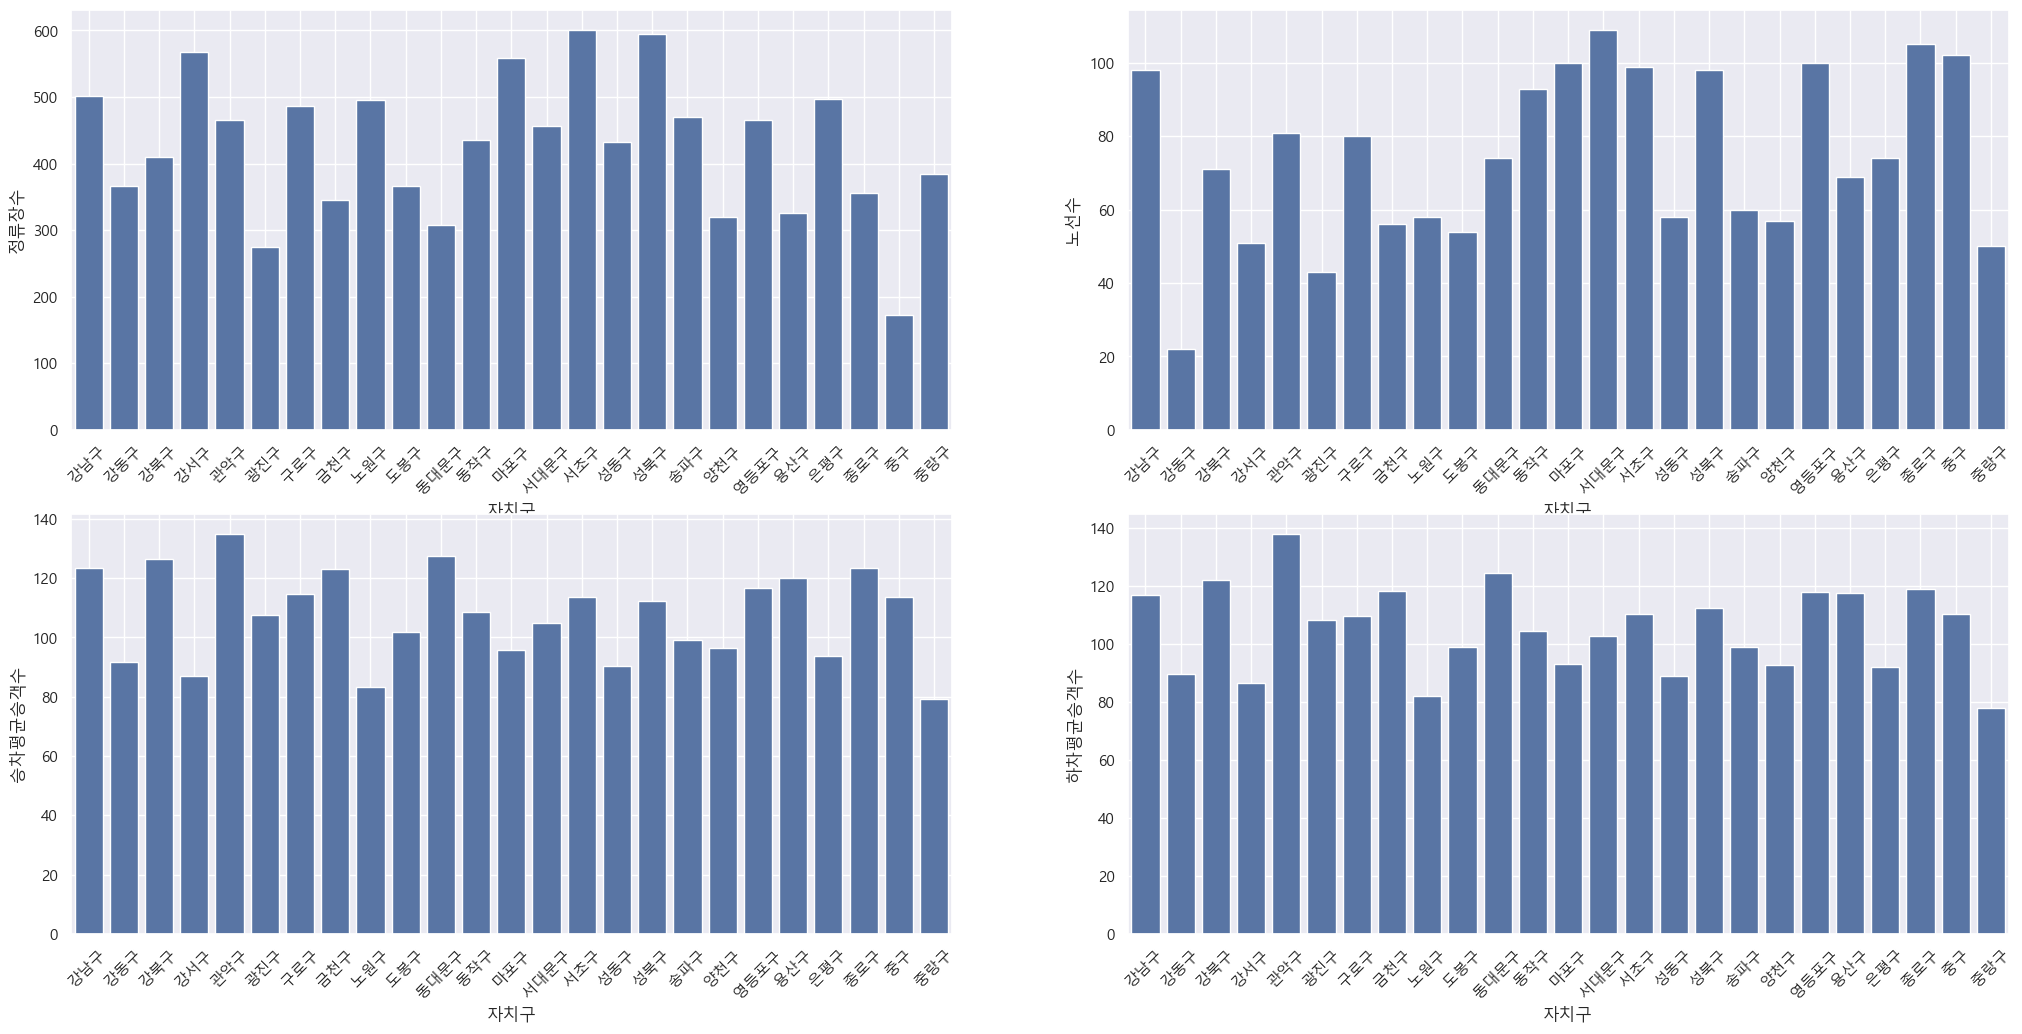

In [67]:
plt.figure(figsize=(25, 12))

plt.subplot(2, 2, 1)
sns.barplot(x='자치구', y='정류장수', data=bus)
plt.xticks(rotation=45)
plt.grid(axis='x')

plt.subplot(2, 2, 2)
sns.barplot(x='자치구', y='노선수', data=bus)
plt.xticks(rotation=45)
plt.grid(axis='x')

plt.subplot(2, 2, 3)
sns.barplot(x='자치구', y='승차평균승객수', data=bus)
plt.xticks(rotation=45)
plt.grid(axis='x')

plt.subplot(2, 2, 4)
sns.barplot(x='자치구', y='하차평균승객수', data=bus)
plt.xticks(rotation=45)
plt.grid(axis='x')

plt.show()

In [68]:
# 위 차트를 통해 알게된 사실을 개인별로 정리해봅시다.
# 1. 서초구가 가장 정류장 수가 많다.
# 2. 중구가 가장 정류장 수가 적다.
# 3. 면적과 유동량의 따라 정류장수가 관계가 있는 것같다.
# 4. 승차, 하차 비슷 출,퇴근이 대부분인 것같음
# 5. 강동구가 정류장 및 승하차 인구에 비해 노선도가 적음 (서울 끝자락이여서?) 양천구도 마찬가지로 노선도가 적음

In [76]:
# 데이터 스케일링
import numpy as np
from sklearn.preprocessing import minmax_scale

In [79]:


# 종사자 수 구분 # 데이터 스케일링
for column in bus.columns[1::]:
    mean = np.mean(bus[column])
    std = np.std(bus[column])
    bus[column] = (bus[column] - mean) / std

In [5]:
plt.subplot(2, 1, 2)
plt.title('자치구별 업종 점포 수')
plt.plot(seoul_business['자치구'], seoul_business['한식 일반 음식점업'], marker='o', label='한식 일반 음식점 수')
plt.plot(seoul_business['자치구'], seoul_business['커피전문점'], marker='^', label='커피전문점 수')
plt.plot(seoul_business['자치구'], seoul_business['일반 교과 학원'], marker='s', label='일반 교과 학원 수')
plt.plot(seoul_business['자치구'], seoul_business['한식 육류요리 전문점'], marker='d', label='한식 육류요리점 수')
plt.plot(seoul_business['자치구'], seoul_business['남녀용 겉옷 및 셔츠 도매업'], marker='x', label='남녀용 겉옷 및 셔츠 도매업 수')
plt.grid(True)
plt.legend()

NameError: name 'plt' is not defined

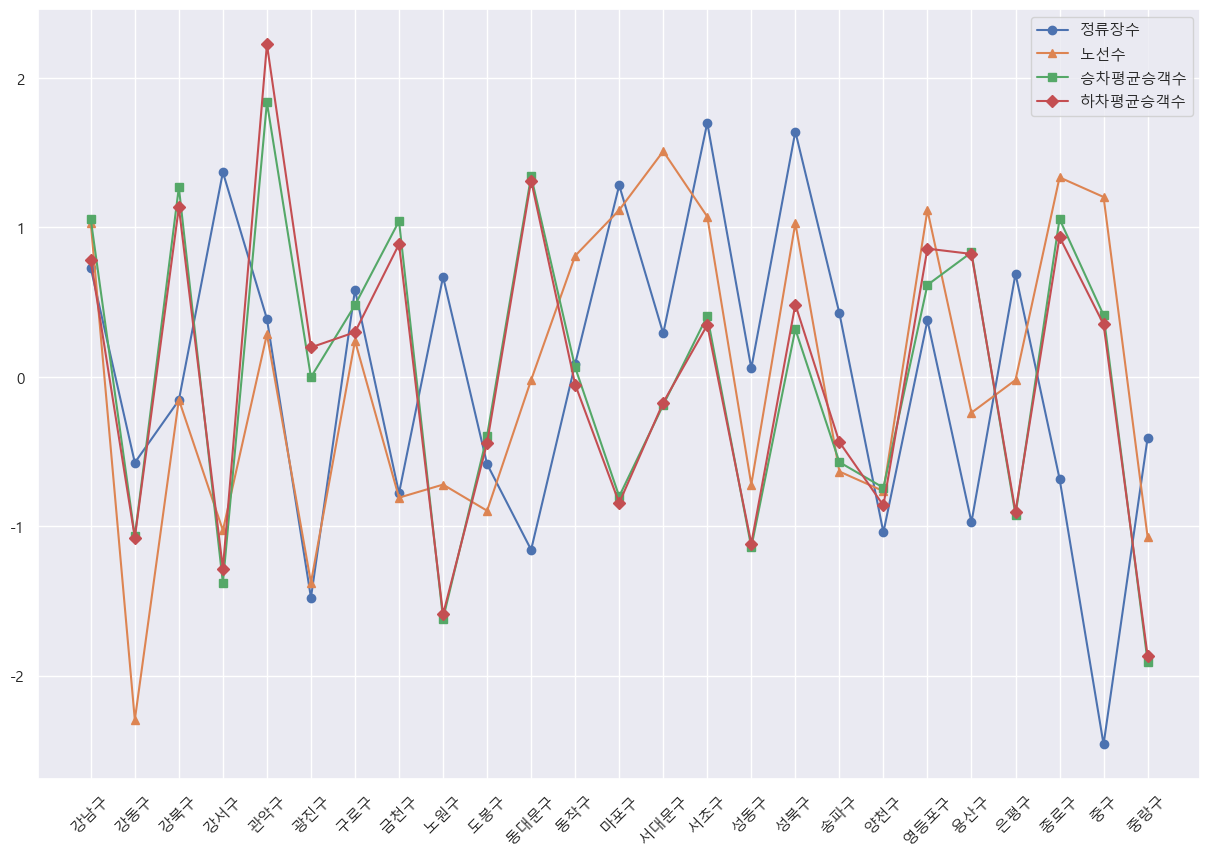

In [88]:
plt.figure(figsize=(15, 10))
plt.plot('자치구', '정류장수', marker='o', label='정류장수', data=bus)
plt.xticks(rotation=45)
plt.grid(axis='x')

plt.plot('자치구', '노선수', marker='^', label='노선수', data=bus)
plt.xticks(rotation=45)
plt.grid(axis='x')

plt.plot('자치구', '승차평균승객수', marker='s', label='승차평균승객수', data=bus)
plt.xticks(rotation=45)
plt.grid(axis='x')

plt.plot('자치구', '하차평균승객수', marker='D', label='하차평균승객수', data=bus)
plt.xticks(rotation=45)
plt.grid(axis='x')


plt.legend()
plt.show()

---